In [2]:
# Install dependencies 
!pip install scikit-learn pandas matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 18.3 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


TF-IDF

In [4]:
sentences = [
    "I love dogs, not cats",
    "I love cats, not dogs",
    "He went to the bank to deposit money",
    "He sat by the bank of the river",
    "good movie",
    "great film",
    "terrible movie"
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)

pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())


,bank,by,cats,deposit,dogs,film,good,great,he,love,money,movie,not,of,river,sat,terrible,the,to,went
0,0.000000,0.000000,0.5,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.5,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.275669,0.000000,0.0,0.332097,0.0,0.000000,0.000000,0.000000,0.275669,0.0,0.332097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.275669,0.664194,0.332097
3,0.291048,0.350624,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.291048,0.0,0.000000,0.000000,0.0,0.350624,0.350624,0.350624,0.000000,0.582095,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.769449,0.000000,0.000000,0.0,0.000000,0.638709,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.0,0.000000,0.0,0.707107,0.000000,0.707107,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.638709,0.0,0.000000,0.000000,0.000000,0.769449,0.000000,0.000000,0.000000


Compare Sentence Similarities

In [8]:
pairs = [
    (0, 1),  # I love dogs ↔ I love cats
    (2, 3),  # bank (money vs river)
    (4, 5),  # good movie ↔ great film
    (4, 6)   # good movie ↔ terrible movie
]

for i, j in pairs:
    sim = cosine_similarity(X[i], X[j])[0][0]
    print(f"'{sentences[i]}'  ↔  '{sentences[j]}'  →  Cosine similarity: {sim:.3f}")

'I love dogs, not cats'  ↔  'I love cats, not dogs'  →  Cosine similarity: 1.000
'He went to the bank to deposit money'  ↔  'He sat by the bank of the river'  →  Cosine similarity: 0.321
'good movie'  ↔  'great film'  →  Cosine similarity: 0.000
'good movie'  ↔  'terrible movie'  →  Cosine similarity: 0.408


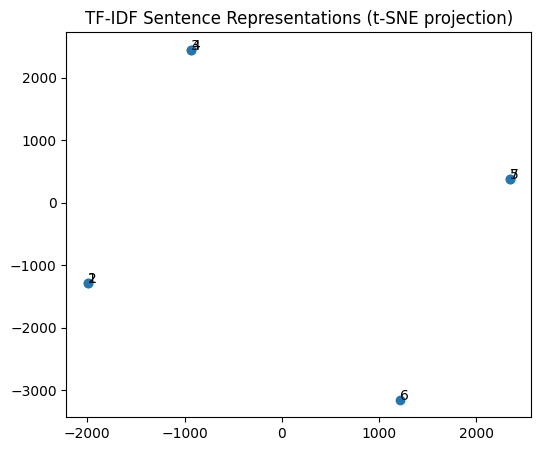

In [13]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


tsne = TSNE(n_components=2, random_state=42, perplexity=2)
X_2d = tsne.fit_transform(X.toarray())

plt.figure(figsize=(6,5))
plt.scatter(X_2d[:,0], X_2d[:,1])
for i, txt in enumerate(range(len(sentences))):
    plt.annotate(f"{i+1}", (X_2d[i,0], X_2d[i,1]))
plt.title("TF-IDF Sentence Representations (t-SNE projection)")
plt.show()

